In [38]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import nibabel as nib

from connectivity import constants as const
from connectivity import visualize_summary as summary

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [90]:
# run connectivity routine
# train and validate ridge model(s)
# evaluate best model (based on CV R)

# navigate to scripts dir
dirs = const.Dirs()
os.chdir(os.path.join(Path(dirs.base_dir).parent, 'connectivity/scripts'))

%run -i 'script_mk.py' --cortex="tesselsWB642" --model_type="WTA"

best model for sc2 is ridge_tesselsWB642_alpha_4
evaluating ridge_tesselsWB642_alpha_4
Evaluating model on s02
Evaluating model on s03
Evaluating model on s09
Evaluating model on s10
Evaluating model on s12
Evaluating model on s15
Evaluating model on s17
Evaluating model on s18
Evaluating model on s19
Evaluating model on s20
Evaluating model on s24
Evaluating model on s25
Evaluating model on s27
Evaluating model on s28
Evaluating model on s29
Evaluating model on s30
Evaluating model on s31
best model for sc1 is ridge_tesselsWB642_alpha_8
evaluating ridge_tesselsWB642_alpha_8
Evaluating model on s02
Evaluating model on s03
Evaluating model on s09
Evaluating model on s10
Evaluating model on s12
Evaluating model on s15
Evaluating model on s17
Evaluating model on s18
Evaluating model on s19
Evaluating model on s20
Evaluating model on s24
Evaluating model on s25
Evaluating model on s27
Evaluating model on s28
Evaluating model on s29
Evaluating model on s30
Evaluating model on s31


<Figure size 1080x720 with 0 Axes>

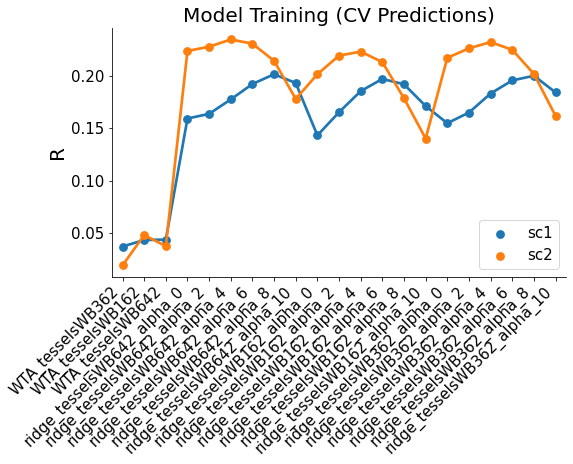

In [3]:
# plot alpha curve for train CVs

df = summary.train_summary()

tmp = df.query('train_name!="WTA_tesselsWB642_absolute_values" and train_name!="WTA_tesselsWB162_absolute_values"')

summary.plot_train_predictions(dataframe=tmp, hue='train_exp');


best model for sc1 is ridge_tesselsWB642_alpha_8
best model for sc2 is ridge_tesselsWB642_alpha_4


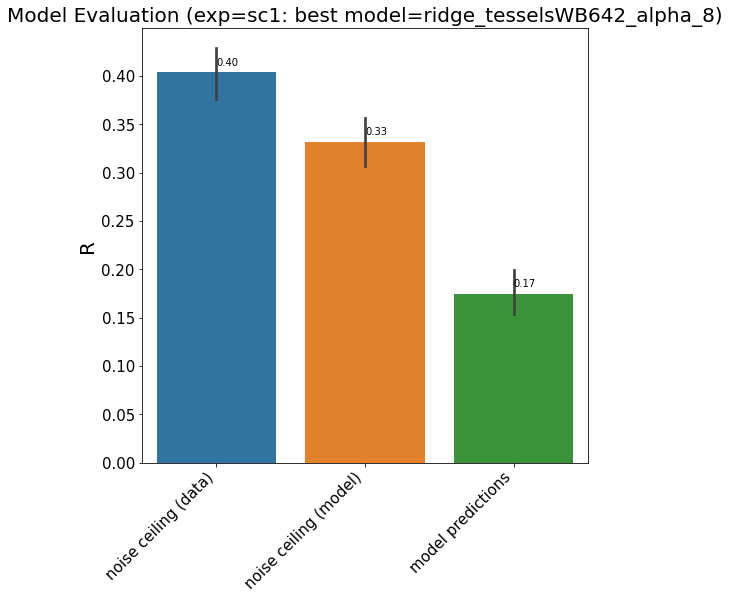

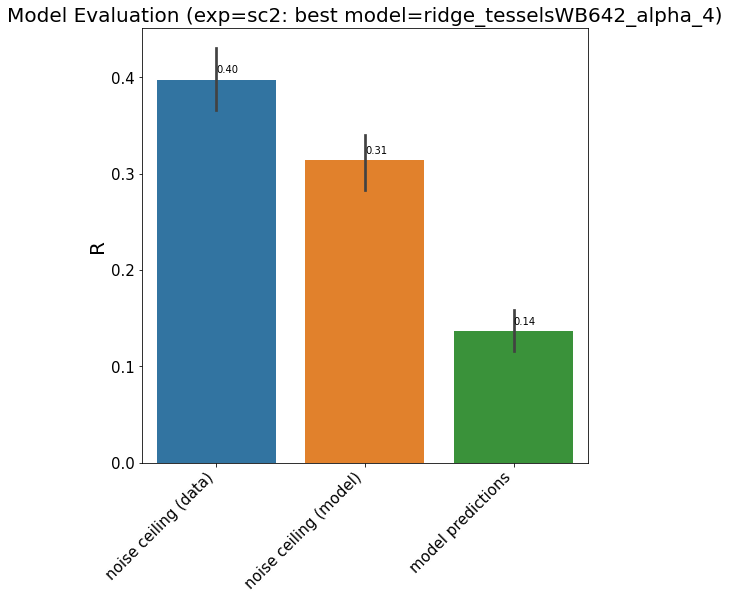

In [7]:
# Model evaluation (noise ceiling and predictions)

# get evaluation 
df_eval = summary.eval_summary()

for exp in ['sc1', 'sc2']:
    
    #plot evaluation
    summary.plot_eval_predictions(dataframe=df_eval, exp=exp)


In [111]:
# visualize voxel maps
view = summary.plot_map(gifti_func='group_noise_X_R_vox', exp='sc1', cscale=[0, 0.8])

view.open_in_browser()

best model for sc1 is ridge_tesselsWB642_alpha_8
